In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import warnings
import sympy as sy
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
from matplotlib.animation import ArtistAnimation, PillowWriter
from IPython.display import HTML

In [2]:
def RK4(f, t_span, dt, x0, const, ftype=float):
    t      = np.arange(t_span[0], t_span[1]+dt, dt)
    x_n    = np.zeros((len(t), len(x0)), dtype=ftype)
    x_n[0] = x0
    for i in range(len(t)-1):
        k1 = dt * f(t[i], x_n[i], const)
        k2 = dt * f(t[i] + 0.5*dt, x_n[i] + 0.5*k1, const)
        k3 = dt * f(t[i] + 0.5*dt, x_n[i] + 0.5*k2, const)
        k4 = dt * f(t[i] + dt, x_n[i] + k3, const)
        x_n[i+1] = x_n[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, x_n

In [3]:
def customize_axes(ax):
    # Hide top/right spines
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Get current axis limits
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # X-axis placement: at y=0 if 0 is inside ylim, else at bottom
    if ylim[0] < 0 < ylim[1]:
        ax.spines['bottom'].set_position(('data', 0))
    else:
        ax.spines['bottom'].set_position(('outward', 0))

    # Y-axis placement: at x=0 if 0 is inside xlim, else at left
    if xlim[0] < 0 < xlim[1]:
        ax.spines['left'].set_position(('data', 0))
    else:
        ax.spines['left'].set_position(('outward', 0))

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


**4.4.1** <span style="color:red">(Validity of overdamped limit)                                                                                                                           
Find the conditions under which it is valid to approximate the equation                                                                                        
$ \qquad\displaystyle mL^2\ddot{\theta}+b\dot{\theta}+mgL\sin{\theta} = \Gamma$                                                                                                                                        
by its overdamped limit $\quad\displaystyle b\dot{\theta}+mgL\sin{\theta} = \Gamma$     .

 Starting from the full equation (point mass at length $L$):

$ \qquad\displaystyle I\ddot\theta + b\dot\theta + K\sin\theta = \Gamma,$

where $I=mL^2$ and $K=mgL$.                                                                                                                                  
The overdamped approximation is

$ \qquad\displaystyle b\dot\theta + K\sin\theta = \Gamma, $

For motion with a characteristic angular frequency $\displaystyle\omega$ (so $\dot\theta \sim \omega\Delta\theta,\ \ddot\theta\sim\omega^2\Delta\theta$), require

$ \qquad\displaystyle I\omega^2\Delta\theta \ll b\omega\Delta\theta \quad\Longrightarrow\quad I\omega \ll b.$

If the relevant frequency is the small-oscillation (natural) frequency $\displaystyle\omega_0=\sqrt{K/I}=\sqrt{g/L}$,                                                       
the condition becomes $ \quad\displaystyle I\omega_0 \ll b \quad\Longrightarrow\quad b \gg I\omega_0 = mL^2\sqrt{\frac{g}{L}} = m\sqrt{gL^3}.$

So **overdamped limit**  holds when $ \quad\displaystyle \boxed{\,b \gg m\sqrt{gL^3}\,}$

(or more precisely $\displaystyle b\gg 2m\sqrt{gL^3}$ if we want the usual damping-ratio factor of 2).

This can also be written in terms of the damping ratio $\zeta$,

$ \qquad\displaystyle\zeta=\frac{b}{2\sqrt{IK}}=\frac{b}{2\sqrt{mL^2\cdot mgL}}=\frac{b}{2m\sqrt{gL^3}}\qquad\text{require }\zeta\gg1.$

Let the inertial timescale be

$ \qquad\displaystyle\tau_{\rm in}=\frac{I}{b}=\frac{mL^2}{b}. $

If the actual angular motion varies on a timescale $T$,                                                                                                   
then $\displaystyle I\ddot\theta$ is small compared with $b\dot\theta$ whenever $ \displaystyle T \gg \tau_{\rm in}$                                                                                                                             
(i.e. the motion is slow compared with the inertial time).

So if the external forcing or initial perturbation produces slow evolution (large $T$),                                                                      
inertia can be dropped even if $b$ is not extremely large.

A convenient dimensionless measure is

$ \qquad\displaystyle\varepsilon \;=\; \frac{IK}{b^2}=\frac{mL^2\cdot mgL}{b^2}= \frac{m^2 g L^3}{b^2}.$

The overdamped approximation is valid when $\varepsilon\ll1$ (equivalently $b^2\gg m^2gL^3$).


**4.4.2** <span style="color:red">(Understanding $\sin \theta(t)$)                                                                                                             
By imagining the rotational motion of an overdamped pendulum, sketch $\sin \theta(t) \ vs. \ t$ for a typical solution of $\dot{\theta} = \gamma − \sin\theta$ .                                                                                                                                                           
How does the shape of the waveform depend on $\gamma \ ?$                                                                                                  
Make a series of graphs for different $\gamma$ , including the limiting cases  $\gamma\approx 1$ and $\gamma\gg 1$.                                           
For the pendulum, what physical quantity is proportional to $\sin \theta(t) \ ?$

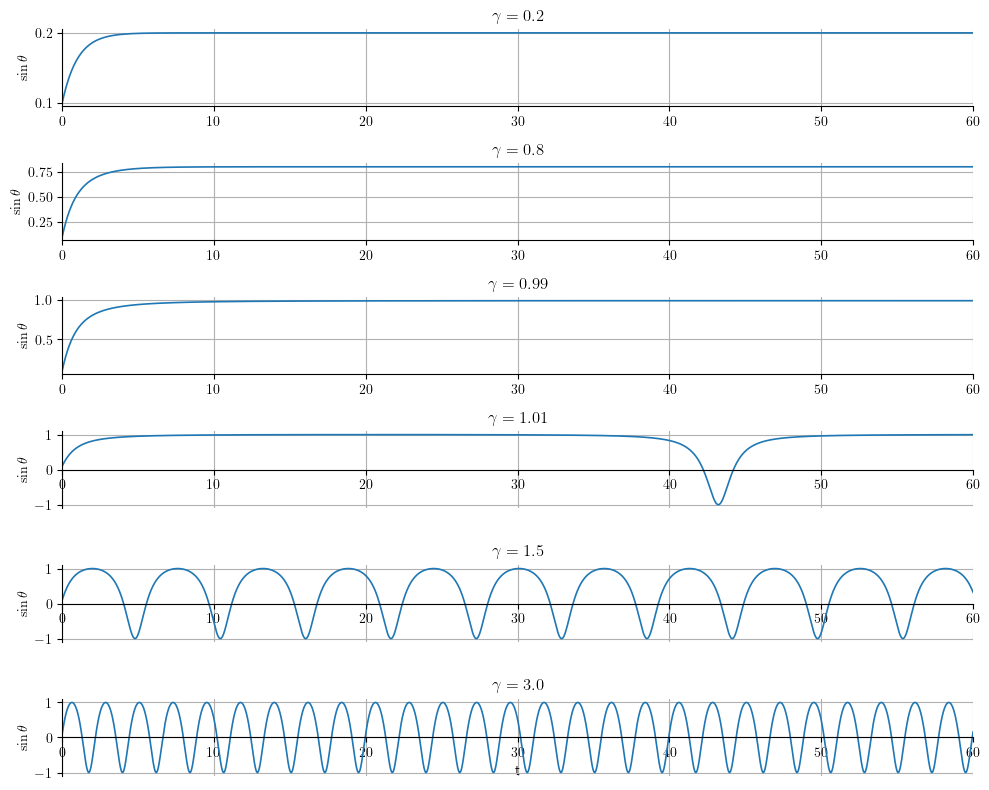

In [4]:
def f(t, theta, gamma):
    return np.array([gamma - np.sin(theta[0])])

gammas = [0.2, 0.8, 0.99, 1.01, 1.5, 3.0]
t_span = (0, 60)
dt     = 0.01

plt.figure(figsize=(10, 8))
for i, g in enumerate(gammas, 1):
    t, theta = RK4(f, t_span, dt, x0=[0.1], const=g)
    s = np.sin(theta[:, 0])
    ax = plt.subplot(len(gammas), 1, i)
    ax.plot(t, s, lw=1.2)
    ax.set_xlim(t_span)
    ax.set_ylabel(r'$\sin\theta$')
    ax.set_title(fr'$\gamma={g}$')
    ax.grid(True)
    customize_axes(ax)
    if i == len(gammas):
        ax.set_xlabel('t')

plt.tight_layout()
plt.show()

**4.4.3** <span style="color:red">(Understanding $\dot{\theta}(t)$)                                                                                                                              
Redo Exercise 4.4.2, but now for $\dot{\theta}(t)$ instead of $\sin\theta(t)$ .

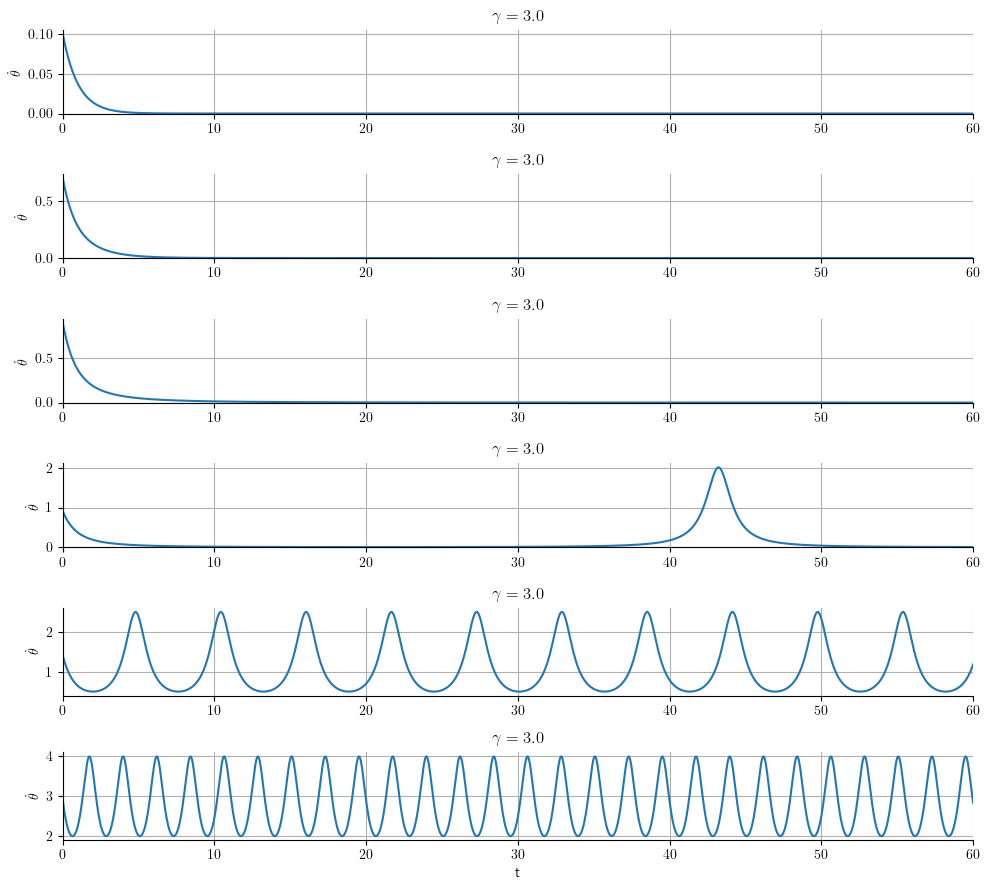

In [5]:
def f(t, theta, gamma):
    return np.array([gamma - np.sin(theta[0])])

# Parameters
gammas = [0.2, 0.8, 0.99, 1.01, 1.5, 3.0]
t_span = (0, 60)
dt     = 0.01
theta0 = [0.1]

plt.figure(figsize=(10, 9))
for i, gamma in enumerate(gammas, 1):
    t, theta  = RK4(f, t_span, dt, x0=[0.1], const=gamma)
    theta_dot = gamma - np.sin(theta[:, 0])
    ax = plt.subplot(len(gammas), 1, i)
    ax.plot(t, theta_dot, lw=1.5)
    ax.set_xlim(t_span)
    ax.set_ylabel(r'$\dot\theta$')
    ax.set_title(fr'$\gamma={g}$')
    ax.grid(True)
    customize_axes(ax)
    if i == len(gammas):
        ax.set_xlabel('t')

plt.tight_layout()
plt.show()

**4.4.4** <span style="color:red">(Torsional spring)                                                                                                                            
Suppose that our overdamped pendulum is connected to a torsional spring.                                                                                   
As the pendulum rotates, the spring winds up and generates an opposing torque $-k\theta$.                                                                              
Then the equation of motion becomes                                                                                                                              
$\quad\displaystyle b\dot{\theta}+mgL\sin{\theta} = \Gamma-k\theta$.                                                                                             
a) Does this equation give a well-defined vector field on the circle?                                                                                                                              
b) Nondimensionalize the equation.                                                                                                                              
c) What does the pendulum do in the long run?                                                                                                                              
d) Show that many bifurcations occur as $k$ is varied from $0$ to $\infty$. What kind of bifurcations are they $?$

The system is described by                                                                                                                                    
$\qquad\displaystyle b \dot{\theta} + mg L \sin \theta = \Gamma - k \theta$                                                                                
where,                                                                                                                                                          
* $b$ = damping constant,
* $mgL \sin \theta$ = gravitational torque,
* $\Gamma$ = constant external torque,
* $k \theta$ = torsional spring torque.

**(a)** We can rewrite the equation as

$\qquad\qquad\displaystyle \dot{\theta} = \frac{\Gamma - k \theta - mg L \sin \theta}{b} $

* The vector field is $F(\theta) = \dot{\theta}(\theta)$.
* For a **well-defined vector field on the circle**, $F(\theta)$ must be **periodic** with period $2\pi$, because $\theta$ lives on the circle.

Here, $-k \theta$ is **not $2\pi$-periodic**, because $k(\theta + 2\pi) \neq k \theta$.

**Hence**, the vector field **is not well-defined on the circle** for $k \neq 0$, because the torsional spring term breaks $2\pi$-periodicity.

**(b)** Let’s define dimensionless variables

$\qquad\qquad\displaystyle\tau = \frac{mg L}{b} t, \quad \tilde{\Gamma} = \frac{\Gamma}{mg L}, \quad \tilde{k} = \frac{k}{mg L}$

Then,                                                                                                                                                        
$\qquad\qquad\displaystyle b \frac{d\theta}{dt} + mg L \sin \theta = \Gamma - k \theta \quad \Rightarrow \quad \frac{d\theta}{d\tau} + \sin\theta = \tilde{\Gamma} - \tilde{k} \theta $

or equivalently,   $\quad\displaystyle\boxed{\frac{d\theta}{d\tau} = \tilde{\Gamma} - \tilde{k} \theta - \sin\theta}$                                            
* This is a **dimensionless form**.

**(c)** This is an **overdamped system**, so it cannot oscillate. Long-term behavior is determined by **fixed points**:

$\qquad\qquad\displaystyle \dot{\theta} = 0 \quad \Rightarrow \quad \sin\theta + \tilde{k} \theta = \tilde{\Gamma} $

* This is a **transcendental equation**; solutions depend on $\tilde{k}$ and $\tilde{\Gamma}$.
* The system will relax to **one of these stable fixed points**.
* As $k$ increases, the spring dominates and the pendulum approaches $\theta \approx \Gamma/k$.
* So **in the long run, the pendulum settles to a static equilibrium** determined by the balance of spring, gravity, and external torque.

**(d)** Fixed points satisfy

$\qquad\qquad\displaystyle f(\theta) = \tilde{\Gamma} - \tilde{k} \theta - \sin\theta = 0 $

* For **small $k$**, gravity dominates → multiple fixed points possible (e.g., stable/unstable points near $\theta = n\pi$).
* As $k$ increases, the linear spring term $-\tilde{k}\theta$ dominates → eventually only **one fixed point** survives.

**Observation :**

* As $k$ increases, **pairs of fixed points collide and disappear**.

* This is a **saddle-node (fold) bifurcation**.

* So **many saddle-node bifurcations occur** as $k$ is increased from 0 to ∞.


**6.7.1** <span style="color:red">(Damped pendulum)                                                                                                                                 
Find and classify the fixed points of $\displaystyle\ddot{\theta}+b\dot{\theta}+\sin{\theta} = 0$ for all $b> 0$, and plot the phase portraits for the qualitatively different cases.

System $\quad\displaystyle\ddot\theta + b\dot\theta + \sin\theta = 0,\qquad b>0.$

$\qquad\qquad\displaystyle \theta_1=\theta,\quad \theta_2=\dot\theta,$

$\qquad\qquad\displaystyle\dot\theta_1=\theta_2,\qquad \dot\theta_2=-\sin\theta_1 - b\theta_2.$

**Fixed points:** $\theta_2=0$ and $\sin\theta_1=0$ so

$\qquad\qquad\displaystyle (\theta^*,\;0)=(n\pi,0),\qquad n\in\mathbb Z.$

**Linearization (Jacobian at $(\theta^*,0)$)**

$\qquad\qquad\displaystyle J=\begin{pmatrix}0 & 1\\ -\cos\theta^* & -b\end{pmatrix}.$

* For **even $n$** ($\theta^*=0,2\pi,\dots$): $\cos\theta^*=1$.

  Characteristic equation                                                                                                                                    
  $\qquad\qquad\displaystyle\lambda^2 + b\lambda + 1 =0$.

  * If $b^2<4$ ($0<b<2$): complex conjugate eigenvalues with negative real part → **stable spiral (focus)**.
  * If $b=2$: double real negative eigenvalue → **degenerate (critical) node**.
  * If $b>2$: two real negative eigenvalues → **stable node**.

* For **odd $n$** ($\theta^*=\pi,\dots$): $\cos\theta^*=-1$.

   Characteristic equation                                                                                                                                  
  $\qquad\qquad\displaystyle\lambda^2 + b\lambda -1=0$.                                                                                                         
   Discriminant $b^2+4>0$ so eigenvalues real with opposite signs → **saddle** (unstable) for every $b>0$.

**Conclusion :**                                                                                                                                             
All equilibria at even $n$ are asymptotically stable (node/spiral depending on $b$);                                                                          
all odd-$n$ equilibria are saddles. Phase portraits change qualitatively at $b=2$ (spiral → node).

System $\quad\qquad\displaystyle \ddot{\theta} + b\dot{\theta} + \sin\theta = 0, 
\qquad b > 0.$

Let $\quad\displaystyle x = \theta, \quad y = \dot{\theta}.$

Then $\qquad\displaystyle \dot{x} = y, \qquad \dot{y} = -b y - \sin x.$

So the system is

$\qquad\qquad\displaystyle\begin{cases} \dot{x} = y, \\ \dot{y} = -b y - \sin x.\end{cases}$


### Fixed points

At a fixed point, $\dot{x} = 0$ and $\dot{y} = 0$.

So

$\qquad\qquad\displaystyle y = 0, \quad -\sin x = 0 \;\;\Longrightarrow\;\; x = n\pi, \; n \in \mathbb{Z}.$

Thus fixed points

$\qquad\qquad\displaystyle (x,y) = (n\pi, 0)$

### Jacobian

Jacobian at $(x,y)$

$\qquad\qquad\displaystyle J =
\begin{bmatrix}\frac{\partial \dot{x}}{\partial x} & \frac{\partial \dot{x}}{\partial y} \\ \frac{\partial \dot{y}}{\partial x} & \frac{\partial \dot{y}}{\partial y} \end{bmatrix}=\begin{bmatrix} 0 & 1 \\ -\cos x & -b \end{bmatrix}$

### Classification

Characteristic polynomial

$\qquad\qquad\displaystyle \lambda^2 + b\lambda + \cos x = 0. $

* **Case 1 : $x = 2n\pi$, so $\cos x = 1$.**

   $\qquad\qquad\displaystyle \lambda^2 + b\lambda + 1 = 0.$

   The roots 

   $\qquad\qquad\displaystyle\lambda = \frac{-b \pm \sqrt{b^2 - 4}}{2}.$

  * If $b^2 > 4$: two distinct real negatives → **stable node**.
  * If $b^2 = 4$: double root negative → **degenerate/critical node**.
  * If $b^2 < 4$: complex conjugates with negative real part → **stable spiral (focus)**.

   So $(2n\pi, 0)$ = **stable equilibrium**.

* **Case 2 : $x = (2n+1)\pi$, so $\cos x = -1$.**

   $\qquad\qquad\displaystyle \lambda^2 + b\lambda - 1 = 0.$

   The roots

   $\qquad\qquad\displaystyle \lambda = \frac{-b \pm \sqrt{b^2 + 4}}{2}$

   One root positive, one negative → **saddle point**.

   So $((2n+1)\pi, 0)$ = **unstable equilibrium**.


### Phase portraits 

* For $b > 0$, the stable equilibria at $(2n\pi,0)$ are **attractors** (node or spiral depending on $b$).
* The unstable ones at $((2n+1)\pi,0)$ are **saddles** with separatrices dividing basins of attraction.
* As damping increases, spirals turn into nodes.

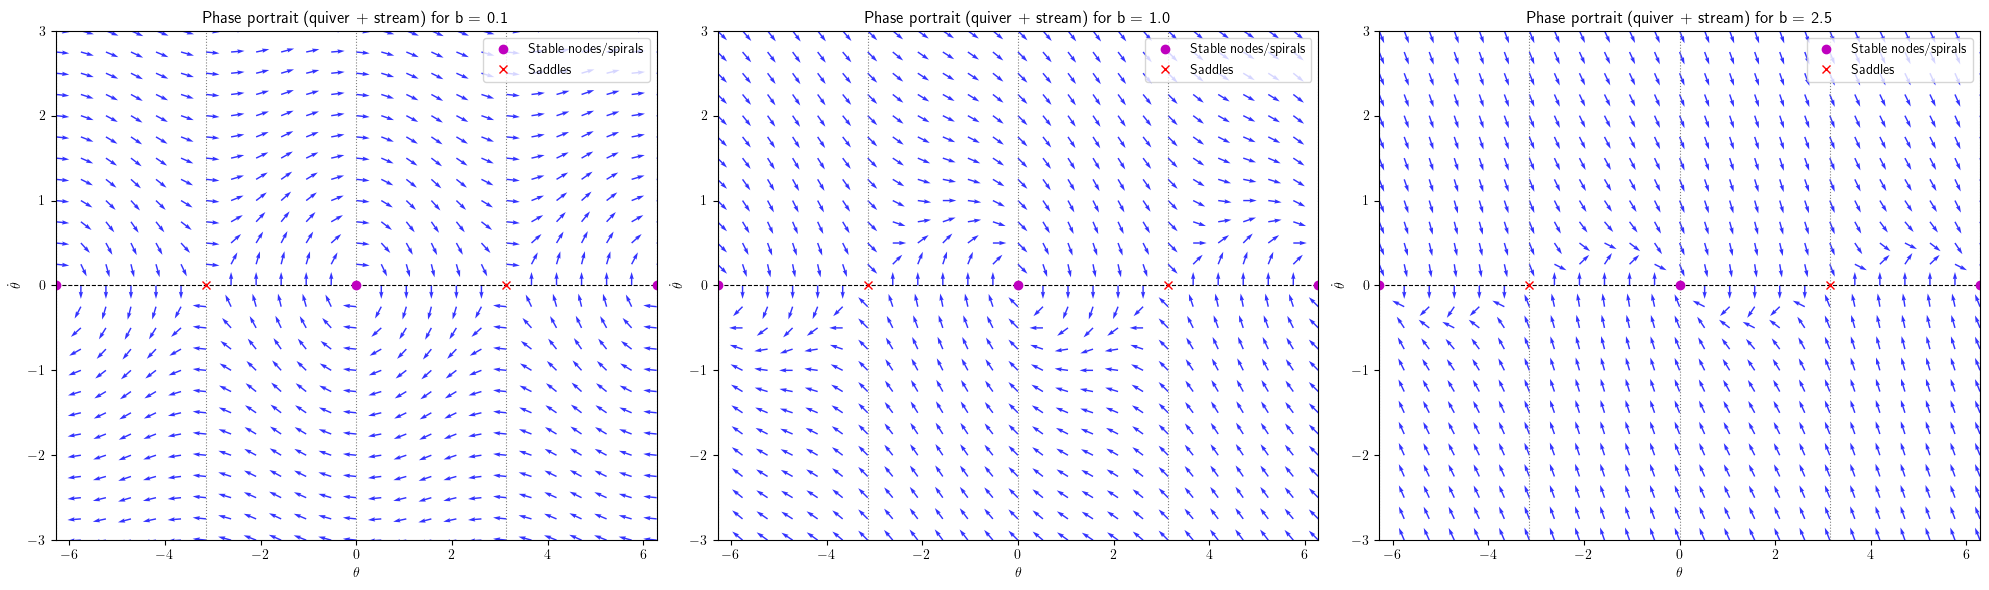

In [31]:
b_values         = [0.1, 1.0, 2.5]  # underdamped, critically damped, overdamped
theta            = np.linspace(-2*np.pi, 2*np.pi, 25)
theta_dot        = np.linspace(-3, 3, 25)
Theta, Theta_dot = np.meshgrid(theta, theta_dot)
stable_theta     = [0, 2*np.pi, -2*np.pi]
unstable_theta   = [np.pi, -np.pi]

fig, axes = plt.subplots(1, 3, figsize=(20,6))

for i, b in enumerate(b_values):
    ax         = axes[i]  
    dTheta     = Theta_dot
    dTheta_dot = -np.sin(Theta) - b*Theta_dot    

    # Normalize for quiver
    N = np.sqrt(dTheta**2 + dTheta_dot**2) + 1e-8

    # Vector field (arrows)
    ax.quiver(Theta, Theta_dot, dTheta/N, dTheta_dot/N, color='b', alpha=0.8)

    # Streamlines
    #ax.streamplot(theta, theta_dot, dTheta, dTheta_dot, color='darkred', density=1.2, linewidth=1)

    # Nullclines / equilibria
    ax.axhline(0, color='k', linestyle='--', lw=0.8)    
    for th in stable_theta + unstable_theta:
        ax.axvline(th, color='gray', linestyle=':', lw=0.8)    

    # Mark equilibrium types
    ax.plot(stable_theta, [0]*len(stable_theta), 'mo', label='Stable nodes/spirals')    
    ax.plot(unstable_theta, [0]*len(unstable_theta), 'rx', label='Saddles')

    ax.set_title(f'Phase portrait (quiver + stream) for b = {b}')
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$\dot\theta$')
    ax.set_xlim([-2*np.pi, 2*np.pi])
    ax.set_ylim([-3, 3])
    ax.legend()

plt.tight_layout()
plt.show()


**6.7.2** <span style="color:red">(Pendulum driven by constant torque)                                                                                                                  
The equation $\displaystyle \ddot{\theta}+\sin{\theta} = \gamma$                                                                                            
describes the dynamics of an undamped pendulum driven by a constant torque,                                                                                    
or an undamped Josephson junction driven by a constant bias current.                                                                                            
a) Find all the equilibrium points and classify them as $\gamma$ varies.                                                                                       
b) Sketch the nullclines and the vector field.                                                                                                                
c) Is the system conservative? If so, find a conserved quantity. Is the system reversible ?                                                                    
d) Sketch the phase portrait on the plane as $\gamma$ varies.                                                                                                     
e) Find the approximate frequency of small oscillations about any centers in the phase portrait.

Undamped pendulum driven by constant torque

$\qquad\qquad\displaystyle\ddot{\theta} + \sin\theta = \gamma$

Introduce

$\qquad\displaystyle \theta_1 = \theta, \quad \theta_2 = \dot{\theta} \implies
\dot{\theta}_1 = \theta_2, \quad \dot{\theta}_2 = \gamma - \sin\theta_1$

### (a) Equilibria and classification

**Equilibrium conditions :**

$\qquad\qquad\displaystyle \dot{\theta}_1 = 0 \implies \theta_2 = 0, \quad\dot{\theta}_2 = 0 \implies \sin\theta = \gamma$

* Fixed points exist only if $|\gamma| \le 1$.
* Equilibrium points:

$\qquad\qquad\displaystyle\theta^* = \arcsin\gamma + 2\pi n, \quad
\theta^* = \pi - \arcsin\gamma + 2\pi n, \quad n \in \mathbb{Z}
$

**Linearization :**

$\qquad\qquad\displaystyle J = \begin{pmatrix} 0 & 1 \\ -\cos\theta^* & 0 \end{pmatrix}, $

$\qquad\qquad\displaystyle \lambda^2 + \cos\theta^* = 0 \implies \lambda = \pm i \sqrt{\cos\theta^*}$

* $\theta^* = \arcsin\gamma \implies \cos\theta^* > 0$ → **center**
* $\theta^* = \pi - \arcsin\gamma \implies \cos\theta^* < 0$ → **saddle**
* $|\gamma| > 1$ → no fixed points → **rotational motion**

### (b) Nullclines and vector field

* $\dot{\theta}_1 = 0 \implies \theta_2 = 0$ → horizontal line
* $\dot{\theta}_2 = 0 \implies \sin\theta = \gamma$ → vertical line(s) if $|\gamma| < 1$

Vector field

$\qquad\qquad\displaystyle (\dot{\theta}, \dot{\theta}_2) = (\theta_2, \gamma - \sin\theta)$

### (c) Conserved quantity

Conservative system: Hamiltonian

$\qquad\displaystyle H(\theta, \dot{\theta}) = \frac{1}{2}\dot{\theta}^2 - \gamma \theta - \cos\theta = \text{constant}$

Reversible under $(t \to -t, \dot{\theta} \to -\dot{\theta})$

### (d) Phase portrait

* $|\gamma| < 1$: centers + saddles → closed orbits and separatrices
* $|\gamma| = 1$: saddle-node bifurcation → degenerate fixed point
* $|\gamma| > 1$: no fixed points → only rotational (open) trajectories

### (e) Frequency of small oscillations

Linearize near the center $\theta_c = \arcsin \gamma$:

$\qquad\qquad\displaystyle\ddot{\theta} \approx -\cos\theta_c (\theta - \theta_c)$

Angular frequency

$\qquad\qquad\displaystyle\omega = \sqrt{\cos\theta_c} = \sqrt{1 - \gamma^2}$

Small-oscillation frequency

$\qquad\qquad\displaystyle f = \frac{\omega}{2\pi} = \frac{\sqrt{1 - \gamma^2}}{2\pi}$

* Near the displaced equilibrium ($\theta_c$), the pendulum behaves like a **linear harmonic oscillator**.
* The restoring “stiffness” comes from gravity, reduced by the torque tilt
* As torque increases, oscillations **slow down** ($f$ decreases).
* At $|\gamma|=1$, oscillations vanish ($f=0$) because the torque exactly cancels the restoring force: the pendulum is neutrally balanced.

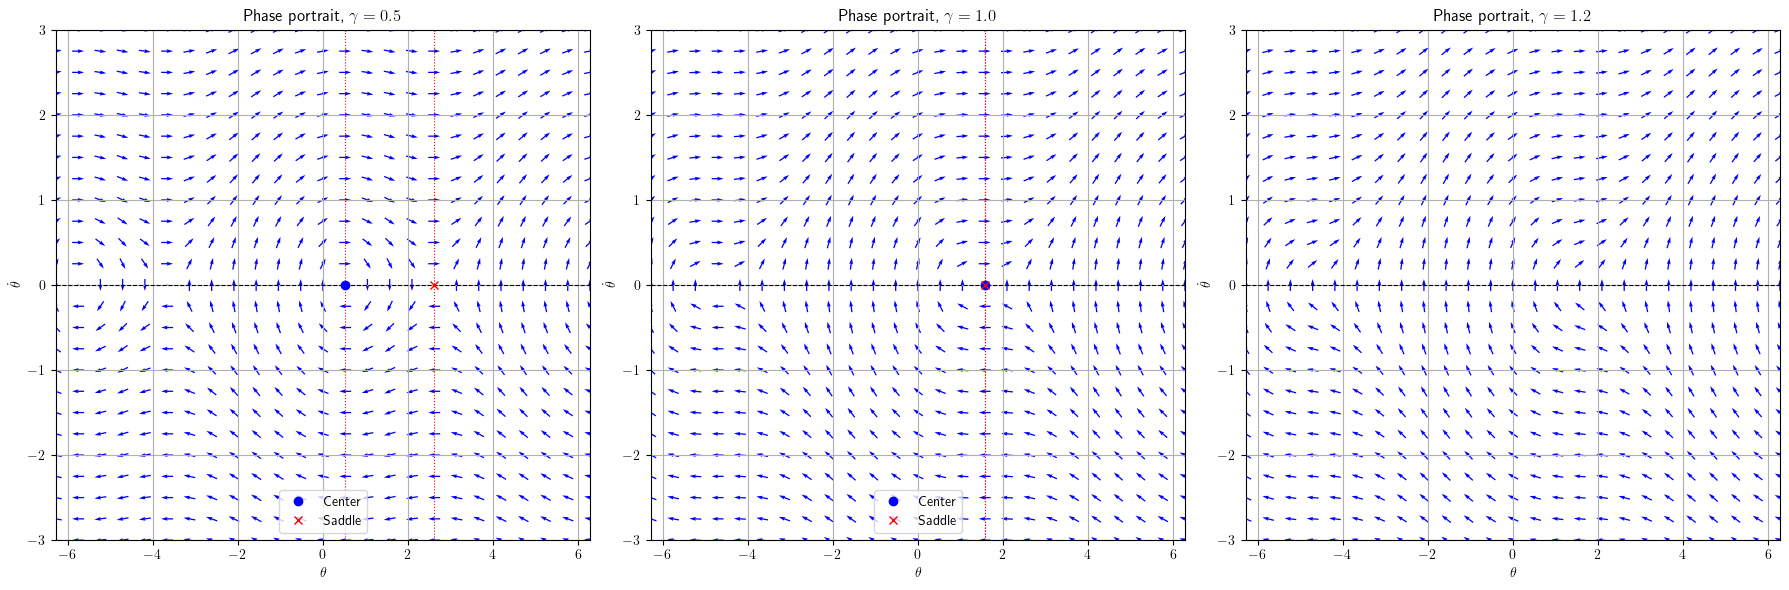

In [37]:
def dtheta_dt(theta, theta_dot, gamma):
    return theta_dot, gamma - np.sin(theta)

gammas    = [0.5, 1.0, 1.2]
theta     = np.linspace(-2*np.pi, 2*np.pi, 25)
theta_dot = np.linspace(-3, 3, 25)
Theta, Theta_dot = np.meshgrid(theta, theta_dot)

fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax, gamma in zip(axes, gammas):
    # Vector field
    dTheta, dTheta_dot = dtheta_dt(Theta, Theta_dot, gamma)
    N = np.sqrt(dTheta**2 + dTheta_dot**2) + 1e-8  # avoid divide by zero
    ax.quiver(Theta, Theta_dot, dTheta/N, dTheta_dot/N, color='b', pivot='mid')

    # Nullclines
    ax.axhline(0, color='k', linestyle='--', lw=0.8)  # θ̇ = 0
    if abs(gamma) <= 1:
        theta_star1 = np.arcsin(gamma)
        theta_star2 = np.pi - np.arcsin(gamma)
        ax.axvline(theta_star1, color='r', linestyle=':', lw=0.8)
        ax.axvline(theta_star2, color='r', linestyle=':', lw=0.8)
        # Mark fixed points
        ax.plot(theta_star1, 0, 'bo', label='Center')
        ax.plot(theta_star2, 0, 'rx', label='Saddle')

    ax.set_xlim([-2*np.pi, 2*np.pi])
    ax.set_ylim([-3, 3])
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$\dot{\theta}$')
    ax.set_title(fr'Phase portrait, $\gamma={gamma}$')
    ax.grid(True)
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend()

plt.tight_layout()
plt.show()

**6.7.3** <span style="color:red">(Nonlinear damping)                                                                                                                                    
Analyze $\displaystyle\ddot{\theta}+(1+a\cos\theta)\dot{\theta}+\sin\theta = 0$, for all $a\ge 0$.

We are given

$\qquad\qquad\displaystyle \ddot{\theta} + (1 + a \cos\theta)\dot{\theta} + \sin\theta = 0, \quad a \ge 0$

Introduce

$\qquad\qquad\displaystyle \theta_1 = \theta, \quad \theta_2 = \dot{\theta} $

Then

$\qquad\qquad\displaystyle \dot{\theta}_1 = \theta_2, \quad \dot{\theta}_2 = - (1 + a \cos\theta_1)\theta_2 - \sin \theta_1 $

So the system is

$\qquad\qquad\displaystyle \begin{cases} \dot{\theta} = \theta_2 \\ \dot{\theta}_2 = -\sin\theta - (1 + a \cos\theta)\theta_2 \end{cases} $

* Note: **damping depends on θ** → nonlinear damping.


Fixed points satisfy

$\qquad\qquad\displaystyle \dot{\theta} = 0 \implies \theta_2 = 0 $

$\qquad\qquad\displaystyle \dot{\theta}_2 = 0 \implies -\sin\theta - (1 + a \cos\theta) \cdot 0 = 0 \implies \sin\theta = 0$

So fixed points are independent of **a**:

$\qquad\qquad\displaystyle (\theta^*, \theta_2^*) = (n\pi, 0), \quad n \in \mathbb{Z}$

* Same as the linear damping case.


#### Jacobian

$\qquad\qquad\displaystyle J = \begin{pmatrix} 0 & 1 \\  -\cos\theta & -(1 + a \cos\theta)  \end{pmatrix} $

At $\theta^* = n\pi$

* Even $n$ ($\theta^* = 0, 2\pi, ...$) → $\cos\theta^* = 1$

$\qquad\qquad\displaystyle J = \begin{pmatrix} 0 & 1 \\ -1 & -(1 + a) \end{pmatrix} $

* Odd $n$ ($\theta^* = \pi, 3\pi, ...$) → $\cos\theta^* = -1$:

$\qquad\qquad\displaystyle J = \begin{pmatrix} 0 & 1 \\ 1 & -(1 - a) \end{pmatrix}$


#### Eigenvalues and classification

1. **Even n (θ = 0, 2π, ...)**

   Characteristic equation:

   $\qquad\qquad\displaystyle \lambda^2 + (1 + a)\lambda + 1 = 0 $

   * **Discriminant:** $\Delta = (1 + a)^2 - 4 = a^2 + 2a - 3$

    * $a < 1$: $\Delta < 0$ → **complex eigenvalues**, stable spiral
    * $a = 1$: $\Delta = 0$ → **degenerate node**
    * $a > 1$: $\Delta > 0$ → **stable node**

   * Always **stable** since real part = $-(1+a)/2 < 0$


2. **Odd n (θ = π, 3π, ...)**

   Characteristic equation

   $\qquad\qquad\displaystyle \lambda^2 + (1 - a)\lambda - 1 = 0$

   * **Discriminant:** $\Delta = (1 - a)^2 + 4 = a^2 - 2a + 5 > 0$ always
   * Eigenvalues: $ \displaystyle \lambda = \frac{-(1-a) \pm \sqrt{(1-a)^2 + 4}}{2}$

     * One positive, one negative → **saddle**
     * **Unstable** for all a ≥ 0


#### Effect of nonlinear damping

* The **stable node/spiral at θ = 0** becomes more overdamped as `a` increases.

* The **saddle at θ = π** remains a saddle, but the damping along the θ̇ direction is altered:

  * `a < 1`: weak damping along θ̇ direction
  * `a = 1`: one eigenvalue = 0 → marginal along one direction
  * `a > 1`: stronger damping along θ̇ direction

* Nonlinear damping **does not change the location of fixed points**, but changes the **rate at which trajectories approach/leave them**.


#### Phase portrait features

1. **Even n (stable) → trajectories spiral or move directly to θ = 0 depending on a**
2. **Odd n (saddle) → separatrices**
3. **a = 0 → linear damping**, standard spiral/node
4. **a > 0 → nonlinear damping → approach to stable points may be faster/slower depending on θ**




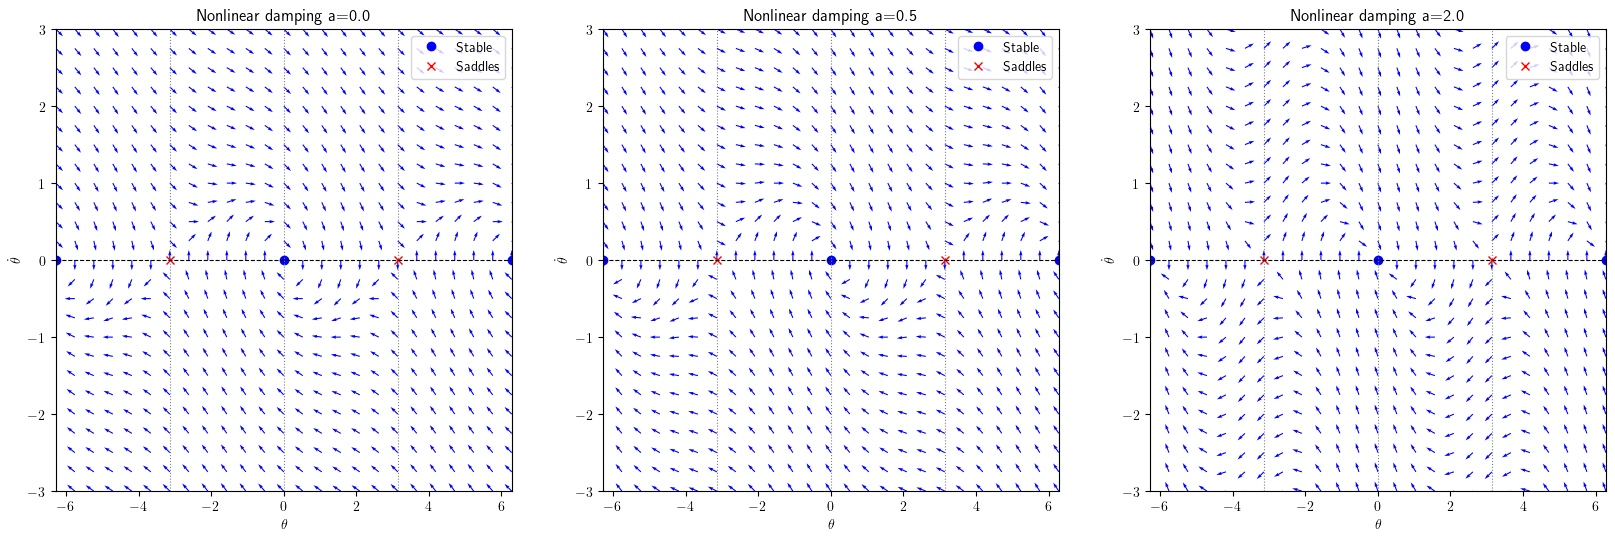

In [10]:
a_values         = [0.0, 0.5, 2.0]                  # linear, moderate, strong nonlinear damping
theta            = np.linspace(-2*np.pi, 2*np.pi, 25)
theta_dot        = np.linspace(-3, 3, 25)
Theta, Theta_dot = np.meshgrid(theta, theta_dot)
stable_theta     = [0, 2*np.pi, -2*np.pi]
unstable_theta   = [np.pi, -np.pi]

fig, axes = plt.subplots(1, 3, figsize=(20,6))

for i, a in enumerate(a_values):
    ax = axes[i]
    dTheta = Theta_dot
    dTheta_dot = -np.sin(Theta) - (1 + a*np.cos(Theta))*Theta_dot
    N = np.sqrt(dTheta**2 + dTheta_dot**2)
    ax.quiver(Theta, Theta_dot, dTheta/N, dTheta_dot/N, color='b')
    
    # Plot fixed points
    ax.plot(stable_theta, [0]*len(stable_theta), 'bo', label='Stable')
    ax.plot(unstable_theta, [0]*len(unstable_theta), 'rx', label='Saddles')
    
    ax.axhline(0, color='k', linestyle='--', lw=0.8)
    for th in stable_theta + unstable_theta:
        ax.axvline(th, color='gray', linestyle=':', lw=0.8)
    
    ax.set_title(f'Nonlinear damping a={a}')
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$\dot\theta$')
    ax.set_xlim([-2*np.pi, 2*np.pi])
    ax.set_ylim([-3,3])
    ax.legend()
plt.show()


**6.7.4** <span style="color:red">(Period of the pendulum)                                                                                                                           
Suppose a pendulum governed by $\displaystyle\ddot{\theta}+\sin\theta = 0$ is swinging with an amplitude $\alpha$.                                        
Using some tricky manipulations, we are going to derive a formula for $T(\alpha)$, the period of the pendulum.                                                   
a) Using conservation of energy, show that $\displaystyle\dot{\theta}^2 = 2\left(\cos{\theta}−\cos{\alpha}\right)$ and hence that                                 
$\qquad\qquad\qquad\displaystyle T = 4\int_0^{\alpha} \frac{d\theta}{\left[ 2\left(\cos{\theta} - \cos{\alpha} \right) \right]^{1/2} }$                                       
b) Using the half-angle formula, show that                                                                                                                              
$\qquad\qquad\qquad\displaystyle T = 4\int_0^{\alpha} \frac{d\theta}{\left[ 4\left(\sin^2\frac{1}{2}{\alpha} - \sin^2\frac{1}{2}{\theta}\right) \right]^{1/2}}$                                                                                                                                                 
c) The formulas in parts (a) and (b) have the disadvantage that $\alpha$ appears in both the integrand and the upper limit of integration.                    
To remove the $\alpha -$dependence from the limits of integration, we introduce a new angle $\phi$ that runs from $0$ to $\frac{\pi}{2}$
when $\theta$ runs from $0$ to $\alpha$.                   
Specifically, let $\displaystyle \left(\sin\frac{1}{2}{\alpha}\right)\sin\phi= \sin\frac{1}{2}{\theta}$.                                                      
Using this substitution, rewrite (b) as an integral with respect to $\phi$. Thereby derive the exact result                                                     
$\qquad\qquad\qquad\displaystyle T = 4\int_0^{\pi/2} \frac{d\phi}{\cos\frac{1}{2}\theta} = 4K\left(\sin\frac{1}{2}{\alpha}\right)$,                                             
where the complete elliptic integral of the first kind is defined as                                                                                            
$\qquad\qquad\qquad \displaystyle K(m)=\int_0^{\pi/2} \frac{d\phi}{(1-m\sin^2{\phi})^{1/2}} \quad $ for $0\le m\le 1$.                                        
d) By expanding the elliptic integral using the binomial series and integrating term-by-term, show that                                                          
$\qquad\qquad\qquad\displaystyle T(\alpha) = 2\pi \left[1 + \frac{1}{16}\alpha^2 + \mathcal{O}(\alpha^4) \right] \quad $ for $\alpha\ll 1$.                       
Note that larger swings take longer.

### (a) Energy and the quadrature formula

Multiply $\quad\displaystyle\ddot\theta+\sin\theta=0$ by $\dot\theta$ and integrate:

$\qquad\displaystyle\dot\theta\ddot\theta+\dot\theta\sin\theta=0 \quad\Rightarrow\quad\frac{d}{dt}\!\Big(\tfrac12\dot\theta^2\Big)+\frac{d}{dt}(\!-\cos\theta)=0.$

Hence energy is conserved

$\qquad\displaystyle \tfrac12\dot\theta^2 -\cos\theta = E.$

For amplitude $\alpha$ we have $\dot\theta(\alpha)=0$ so $E=-\cos\alpha$. Thus,

$\qquad\displaystyle \dot\theta^2 = 2(\cos\theta-\cos\alpha)$

$\qquad\displaystyle \dot\theta = \sqrt{2(\cos\theta-\cos\alpha)}$

A quarter period is the time to go from $\theta=0$ to $\theta=\alpha$; hence the full period is

$\qquad\displaystyle\boxed{\,T(\alpha)=4\int_{0}^{\alpha}\frac{d\theta}{\sqrt{2(\cos\theta-\cos\alpha)}}\,.}$

### (b) Half-angle form

Use $\cos\theta=1-2\sin^2(\tfrac\theta2)$ to get

$\qquad\displaystyle \cos\theta-\cos\alpha =(1-2\sin^2\frac{\theta}{2})-(1-2\sin^2\frac{\alpha}{2}) =2\sin^2\frac{\alpha}{2}-2\sin^2\frac{\theta}{2} =2\Big(\sin^2 \frac{\alpha}{2}-\sin^2 \frac{\theta}{2}\Big) $

Substituting into the integrand yields

$\qquad\displaystyle\boxed{\,T(\alpha)=4\int_0^{\alpha}\frac{d\theta}{\sqrt{4\big(\sin^2\frac{\alpha}{2}-\sin^2\frac{\theta}{2}\big)}}\,.}$

### (c) Change of variable to remove $\alpha$ from the limits

Set $\quad\displaystyle\sin\frac{\theta}{2}=\sin\frac{\alpha}{2}\,\sin\phi,\qquad \phi\in[0,\tfrac{\pi}{2}].$

Then $\quad\displaystyle d\theta = 2\frac{\sin(\alpha/2)\cos\phi}{\cos(\theta/2)}\,d\phi,
\qquad\sqrt{\sin^2(\alpha/2)-\sin^2(\theta/2)}=\sin(\alpha/2)\cos\phi.$

Substitute into the integrand of (b),

$\qquad\displaystyle \frac{d\theta}{\sqrt{2(\sin^2(\alpha/2)-\sin^2(\theta/2))}}
=\frac{2\frac{\sin(\alpha/2)\cos\phi}{\cos(\theta/2)}\,d\phi}{\sqrt{2}\,\sin(\alpha/2)\cos\phi}
=\frac{\sqrt{2}\,d\phi}{\cos(\theta/2)}.$

But $\cos(\tfrac{\theta}{2})=\sqrt{1-\sin^2(\tfrac{\theta}{2})}=\sqrt{1-m\sin^2\phi}$ with $m=\sin^2(\tfrac{\alpha}{2})$.                                  
Therefore

$\qquad\displaystyle T(\alpha)=4\int_0^{\pi/2}\frac{d\phi}{\sqrt{1-m\sin^2\phi}}$

so with $m=\sin^2(\tfrac{\alpha}{2})$ we obtain the standard elliptic form

$\qquad\displaystyle\boxed{\,T(\alpha)=4\,K\!\big(m\big),\qquad m=\sin^2\!\tfrac{\alpha}{2},\;}$

where

$\qquad\displaystyle K(m)=\int_0^{\pi/2}\frac{d\phi}{\sqrt{1-m\sin^2\phi}}\qquad(0\le m\le1).$

### (d) Small-amplitude expansion $\alpha\ll1$

For small $\alpha$ we have $\displaystyle m=\sin^2(\tfrac{\alpha}{2})\approx (\tfrac{\alpha}{2})^2=\tfrac{\alpha^2}{4}\ll1$.                             
The binomial expansion integrated termwise gives the standard series for $K(m)$

$\qquad\displaystyle K(m)=\frac{\pi}{2}\Big(1+\frac{m}{4}+\frac{9m^2}{64}+\cdots\Big).$

Thus

$\qquad\displaystyle T(\alpha)=4K(m)=2\pi\Big(1+\frac{m}{4}+\mathcal{O}(m^2)\Big)=2\pi\Big(1+\frac{1}{4}\cdot\frac{\alpha^2}{4}+\mathcal{O}(\alpha^4)\Big)$

so

$\qquad\displaystyle\boxed{\,T(\alpha)=2\pi\Big[1+\frac{1}{16}\alpha^2+\mathcal{O}(\alpha^4)\Big],\qquad \alpha\ll1.}$

This shows the period increases with amplitude; the first correction beyond $2\pi$ is $+\tfrac{1}{16}\alpha^2$.


**6.7.5** <span style="color:red">(Numerical solution for the period)                                                                                                                 
Redo Exercise 6.7.4 using either numerical integration of the differential equation, or numerical evaluation of the elliptic integral.                                                                                                                         
Specifically, compute the period $T(\alpha)$, where $\alpha$ runs from $0$ to $180^{\circ}$ in steps of $10^{\circ}$.

,$\frac{\alpha}{18}\pi$,$2\pi(1+\frac{a^2}{16})$,T_quad
0,$\frac{0}{18}\pi$,6.283185,6.283185
1,$\frac{1}{18}\pi$,6.295148,6.295169
2,$\frac{2}{18}\pi$,6.331034,6.331371
3,$\frac{3}{18}\pi$,6.390846,6.392568
4,$\frac{4}{18}\pi$,6.474582,6.480104
5,$\frac{5}{18}\pi$,6.582243,6.595981
6,$\frac{6}{18}\pi$,6.713828,6.743001
7,$\frac{7}{18}\pi$,6.869338,6.924981
8,$\frac{8}{18}\pi$,7.048772,7.147077
9,$\frac{9}{18}\pi$,7.252131,7.416299


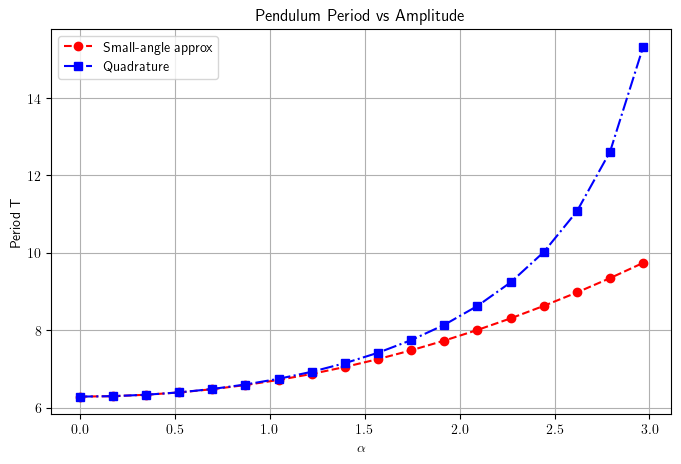

In [27]:
def fix(a):
    return 2*np.pi*(1 + a**2/16)

def num(a):
    def integrand(phi, a):
        return 1 / np.sqrt(1 - (np.sin(a/2)**2) * np.sin(phi)**2)
    I  = sc.integrate.quad(integrand, 0, np.pi/2, args=(a,), limit=200)[0]
    return 4 * I

r_val = np.arange(0, 18, 1)  
data  = []
for i in r_val:
    a = i * np.pi / 18
    alpha_str = rf"$\frac{{{i}}}{{18}}\pi$"  # LaTeX-style fraction
    data.append([alpha_str, fix(a), num(a)])

df = pd.DataFrame(data, columns=[ r"$\frac{\alpha}{18}\pi$", r"$2\pi(1+\frac{a^2}{16})$", "T_quad"])
display(df)

alpha_vals   = [i * np.pi / 18 for i in r_val]
T_small_vals = [row[1] for row in data]
T_quad_vals  = [row[2] for row in data]

plt.figure(figsize=(8,5))
plt.plot(alpha_vals, T_small_vals, 'ro--', label="Small-angle approx")
plt.plot(alpha_vals, T_quad_vals, 'bs-.', label="Quadrature")
plt.xlabel(r"$\alpha$")
plt.ylabel("Period T")
plt.title("Pendulum Period vs Amplitude")
plt.grid(True)
plt.legend()
plt.show()